<H1>Práctica de Análisis Estadístico del viento</H1>
<h2>Grupo de datos 10</h2>


**Andrés Màs, Pau Núñez Jaime Ignacio Vicente**

_Junio 2020_

Se describen los pasos del método de  analisis estadístico del los registros de velocidades y dirección de un sítio determinado. Las medidas corresponden a la velocidad y dirección para dos alturas en concreto, 10 y 40 m. 

Este  análisis de los registros está basado en el uso de  de herramientas Python específicas como [pandas package](https://pandas.pydata.org/)  usadas en análisis de grandes cantidades de datos, comunes en [Data Mining](https://en.wikipedia.org/wiki/Data_mining) o [Deep Learning](https://en.wikipedia.org/wiki/Deep_learning). 

Inicialización de entorno y herramientas de análisis y graficación.

In [29]:
import math
from math import gamma
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

Importación de datos. Este proceso es transparente para el caso de __pandas__ así como la identificación del tipo de datos y las variables de indexación de campos. Diferente al caso de lo realizado con la herramienta  [Matlab](https://es.mathworks.com/campaigns/products/trials.html?gclid=EAIaIQobChMIyo_ghpL56QIVyLLVCh1EUQfEEAAYASAAEgIle_D_BwE&ef_id=EAIaIQobChMIyo_ghpL56QIVyLLVCh1EUQfEEAAYASAAEgIle_D_BwE:G:s&s_kwcid=AL!8664!3!252706751991!e!!g!!matlab&s_eid=ppc_29742641962&q=matlab) usada en las prácticas.

In [30]:
dataWind = pd.read_csv('Group_10.csv.gz',sep=',')
dataWind=dataWind.loc[~((dataWind.vel1 > 60) | (dataWind.vel2 > 60))]

In [31]:
dataWind

,Year,Month,Day,Hour,vel1,vel2,dir,Temp
0,99,Jan,1,0,6.20,7.40,92.6,-4.9
1,99,Jan,1,1,6.86,7.78,86.0,-4.2
2,99,Jan,1,2,7.50,8.50,86.3,-3.7
3,99,Jan,1,3,7.43,8.42,91.9,-3.8
4,99,Jan,1,4,7.64,8.61,89.5,-4.1
...,...,...,...,...,...,...,...,...
5083,99,Jul,31,19,5.35,7.90,64.0,28.1
5084,99,Jul,31,20,5.43,8.14,64.9,26.4
5085,99,Jul,31,21,5.85,8.16,64.7,26.1
5086,99,Jul,31,22,6.54,9.03,61.2,25.8


Los Campos del registro se enumeran de la siguiente manera:

| Altura $z$, (m)  | Direccion (deg)   | Velocidad (m/s)   |   Tiempo Decimal          |
|:-----------------|:-----------------:|:-----------------:|--------------------------:|
| $10\, m $        | _Dir1_            | _Vel1_            |  $ \frac{ time}{ 60*24 } $|
| $40\, m$         | _Dir2_            | _Vel2_            |  $ \frac{ time}{ 60*24 } $|



A partir del método ```keys()``` podemos conocer la organización de los datos del registro.

In [32]:
dataWind.keys()

Index(['Year', 'Month', 'Day', 'Hour', 'vel1', 'vel2', 'dir', 'Temp'], dtype='object')

Graficación  de las medidas de velocidad para las dos alturas disponibles $\text{Vel1}\rightarrow z = 10\; m$ y $\text{Vel2} \rightarrow  z = 40\;m$. 

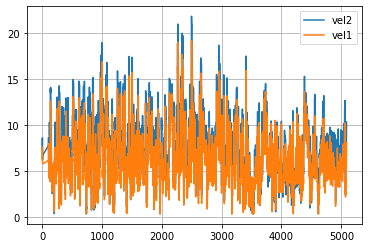

In [33]:

dataWind[{'vel1','vel2'}].plot(grid=True);

Si bien la media aritmética no es un valor exacto de la medida, pero puede ser usado como un indicador de lo dicho. Para $z = 10\;m$. Para su cálculo de sigue, $$\left< v \right> = \frac{1}{N} \sum\limits_{i=0}^{N} x_i \tag{1}$$

In [34]:
np.mean(dataWind['vel1'])

6.516903030303034

In [35]:
print('<v1> = %.2f m/s' % (dataWind['vel1'].mean()))

<v1> = 6.52 m/s


In [36]:
print('<v2> = %.2f m/s' % (dataWind['vel2'].mean()))

<v2> = 7.82 m/s


No menos importante es la desviación de la velocidad respecto al valor medio. Esto da una idea del grado de agitación que tiene el viento . Esta medida la relacionamos con la desviación estándar de la muestra. $$\sigma = \sqrt{\frac{1}{N} \sum\limits_{i=0}^{N} \left(x_i - \left<v\right>\right)^2 } \tag{2}$$

In [37]:
np.std(dataWind['vel1'])

2.9621565043483833

In [38]:
print('sigma = {:.2f} m/s'.format(dataWind['vel1'].std()))

sigma = 2.96 m/s


Sigma nos está dando una idea de la calidad de la medida, pues al conocer la variaciancia puedes hacerte una idea de si ha habido valores muy alejados de la media, por ejemplo debido a una temporada de vientos anormalmente fuertes.

La relación entre $\sigma$ y $\left<v\right>$ define el **Índice de turbulencia** 
$$I = \frac{\sigma}{\left< v \right>}\% \tag{3}$$

Su valor se expresa en tanto porcentual y nos da una idea del grado de agitación del viento que recibe el aerogenerador. Esto es vital para poder conocer el grado de resistencia estructural que debe tener el aerogenerador, pues la turbulencia someterá al aerogenerador a grandes vibraciones.

In [39]:
print('I = %.2f' % (dataWind['vel1'].std()/dataWind['vel1'].mean()*100.))

I = 45.46


In [40]:
N = len(dataWind['vel1'])
N

4950

In [41]:
sigma1 = np.sqrt(np.sum((dataWind['vel1']-np.mean(dataWind['vel1']))**2)/N)
sigma1

2.962156504348385

In [42]:
vmean1 = np.mean(dataWind['vel1'])
vmean1

6.516903030303034

In [43]:
Ind1 = sigma1/vmean1*100
Ind1

45.45343839818721

La longitud de la serie analizada es:

In [44]:
N = len(dataWind)
print(N)

4950


Las medidas han sido tomadas una vez cada hora.

In [45]:
dataWind['Hour'][:10]

0       0
1       1
2       2
3       3
4       4
5       5
6       6
7       7
8       8
106    10
Name: Hour, dtype: int64

<div class="alert-warning">

Cada uno de los valores de las variables registradas es producto de un promedio de 600 valores, correpondiente a una frecuencia de muestros de 1 Hz, una medida por segundo. 

La última columna de datos del registro corresponde con la representación numérica del tiempo expresado en horas decimales.  Esto se puede ver evaluando el promedio de la diferencia de los 10 primeros valores convertidos a minutos. Analizando el promedio de  la diferencia del campo 't' para la constante $60 x 24$ = $1440\; ^{min} / _{dia}$
</div>

In [46]:
#dataWind['t'][:10]

In [47]:
#dataWind['t'][:10].diff().mean()*60*24

In [48]:
#np.mean(np.diff(dataWind['t'][:10]))*60*24

<div class="alert-warning">Vemos que cada intervalo de registros corresponde a los 10 min entre lecturas. </div>

### Valores máximos y mínimos de la velocidad

Los valores máximos y mínimos de la serie analizada son:

Altura $z=10\,m$

In [49]:
print('v max, m/s: %.2f' % (dataWind['vel1'].max()))
print('v min, m/s: %.2f' % (dataWind['vel1'].min()))


v max, m/s: 19.15
v min, m/s: 0.36


Altura $z=40\,m$

In [50]:
print('v max, m/s: %.2f' % (dataWind['vel2'].max()))
print('v min, m/s: %.2f' % (dataWind['vel2'].min()))


v max, m/s: 21.80
v min, m/s: 0.36


### Analisis del Corte del Viento

Es importante reconocer valores que no se corresponden con las lecturas esperadas para los rangos de velocidades de la región. Este tipo de valores no esperados pueden ser debidos a fallos en los registros, formaciones de hielo en los sensores que impiden su medidas o perdidas de medidas por otros motivos medioambientales: posamiento de aves, depósito de elementos vegetales, etc.

Ley Potencial de la ABL

$$v_{max,2} = v_{max,1} \left(\frac{z_2}{z_1}\right)^{1/a}$$ 

Expresión de cálculo de $a$,
$$\log\left(\frac{v_{max,2}}{v_{max,1}}\right) = \frac{1}{a} \log\left(\frac{z_2}{z_1}\right)$$ 
$$a = \frac{ \log\left(\frac{z_2}{z_1}\right)}{\log\left(\frac{v_{max,2}}{v_{max,1}}\right)}$$ 

In [51]:
z1,z2 = 10,40 # m 

Usamos los 1000 primeros valores de la medida

In [52]:
vz1_ave = dataWind['vel1'][:999].mean()
vz2_ave = dataWind['vel2'][:999].mean()

In [53]:
a = np.log(z2/z1)/np.log(vz2_ave/vz1_ave)

In [54]:
print('Coeficiente de territorio, alpha = {:.2f}'.format(a))

Coeficiente de territorio, alpha = 6.44


### Perfil de velocidad por el corte del viento

In [55]:
ABLPotencial = lambda z : v10 * (z/z10)**(1/a)

In [56]:
z = np.linspace(0,150,150)
z10 = z1
v10 = dataWind['vel1'].mean()

In [57]:
a = 6.33

a = 6

Perfil de velocidad y su gradiente

In [58]:
vABL = ABLPotencial(z)
dvABL_dz = np.diff(vABL)/np.mean(np.diff(z)) # derivacion numerica 

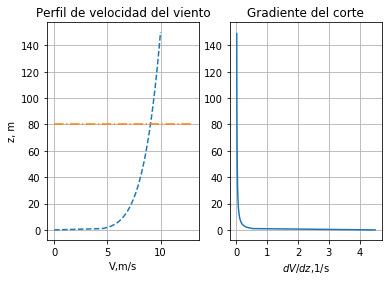

In [59]:
ax1 = plt.subplot(121)
plt.plot(vABL,z,'--')
plt.title('Perfil de velocidad del viento')
plt.xlabel('V,m/s')
plt.ylabel('z, m')
plt.plot([0,13],[80,80],'-.')
plt.grid()

plt.subplot(122,sharey=ax1)
plt.plot(dvABL_dz,z[:-1])
plt.title('Gradiente del corte')
plt.xlabel('$dV/dz$,1/s')
#plt.ylabel('z, m')
plt.grid()

plt.show()

Ejemplo de como afecta el corte del viento a la eficiencia del rotor

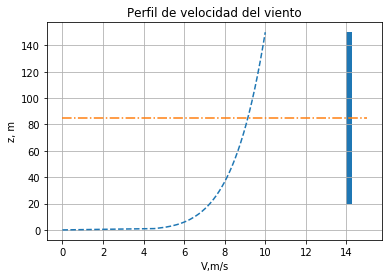

In [60]:
hub=85 # m
radii=65 # m
a=[13,hub-radii]
b=[13+0.25,hub-radii]
c=[13+0.25,hub+radii]
d=[13,hub+radii]
width = c[0] - a[0]
height = d[1] - a[1]

import matplotlib.patches as patches

fig1 = plt.figure()
ax1 = fig1.add_subplot(111)
ax1.add_patch(patches.Rectangle((14, hub-radii), width, height))
ax1.plot(vABL,z,'--')
plt.title('Perfil de velocidad del viento')
plt.xlabel('V,m/s')
plt.ylabel('z, m')
plt.plot([0,15],[hub,hub],'-.')
ax1.grid()
plt.show()

plt.plot(vABL,z,'--')
plt.title('Perfil de velocidad del viento')
plt.xlabel('V,m/s')
plt.ylabel('z, m')
plt.plot([0,13],[80,80],'-.')
plt.grid()
plt.show()

In [61]:
dataWind['vel1'].median()

6.015

In [62]:
dataWind['vel2'].median()

7.62

### Creación del histograma a partir del registro de medidas. 

Para conseguir un histograma equilibrado entre los valores máximos y mínimos de las lescturas necesitamos conocer el número de clases más adecuado. 

$$N_{class} = |1 + 3.3  \log_{10} N|+1$$

In [63]:
Nclass = int(1 + 3.3 * math.log10(N)) + 1
Nclass

14

Histograma de la velocidad $V_{10}$

In [64]:
dataWind['vel1'].mean()

6.516903030303034

In [65]:
dataWind['vel1'].median()

6.015

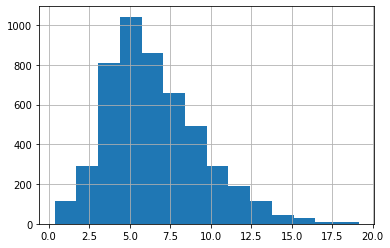

In [66]:
dataWind['vel1'].hist(bins=Nclass);

Histograma de la velocidad $V_{40}$

In [67]:
dataWind['vel2'].mean()

7.819042424242407

In [68]:
dataWind['vel2'].median()

7.62

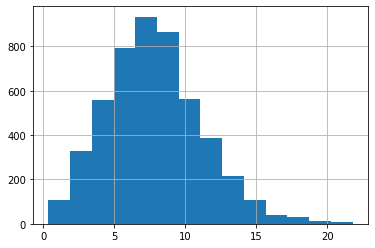

In [69]:
dataWind['vel2'].hist(bins=Nclass);

Si superponemos ambos histogramas veremos el cierto parecido entre ambos pero al mismo tiempo el corrimiento en las $V_{10}$ y $V_{30}$ debido al efecto de la ABL, _Atmospheric Boundary Layer_.

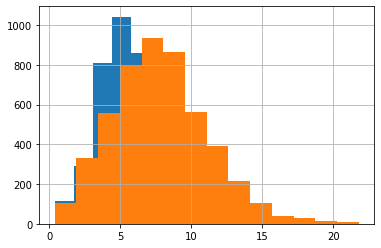

In [70]:
dataWind['vel1'].hist(bins=Nclass)
dataWind['vel2'].hist(bins=Nclass);

### Vectorización de los datos

Para la identificación de los parámetros de Weibull, es conveniente trabajar sobre las medidas con  formato de vectores. 

In [71]:
u1 = np.array(dataWind['vel1'])
u2 = np.array(dataWind['vel2'])

In [72]:
u1

array([6.2 , 6.86, 7.5 , ..., 5.85, 6.54, 8.09])

In [73]:
u2

array([ 7.4 ,  7.78,  8.5 , ...,  8.16,  9.03, 10.33])

A partir de funciones integradas dentro del paquete [numpy](https://numpy.org/) se pueden obtener los vectores de las clases y las frecuencias de la medida de las mismas. 

Se obtiene los valores de histograma y las posiciones (velocidad) centradas en cada una de las clases.

In [74]:
u1hist,u1nclass = np.histogram(u1,bins=Nclass,range=(u1.min()+0.5,u1.max()))
u2hist,u2nclass = np.histogram(u2,bins=Nclass,range=(u2.min()+0.5,u2.max()))

Como ejemplo:

In [75]:
u1hist,u1nclass

(array([142, 432, 926, 997, 777, 580, 436, 268, 170,  94,  47,  26,   8,
         11]),
 array([ 0.86      ,  2.16642857,  3.47285714,  4.77928571,  6.08571429,
         7.39214286,  8.69857143, 10.005     , 11.31142857, 12.61785714,
        13.92428571, 15.23071429, 16.53714286, 17.84357143, 19.15      ]))

In [76]:
u1hist.size

14

In [77]:
u1nclass.size

15

In [78]:
u2nclass

array([ 0.86      ,  2.35571429,  3.85142857,  5.34714286,  6.84285714,
        8.33857143,  9.83428571, 11.33      , 12.82571429, 14.32142857,
       15.81714286, 17.31285714, 18.80857143, 20.30428571, 21.8       ])

De nuevo vemos que el histograma presenta la distribución presentada en la figura anterior, obetenida dirctamente a través de los métodos de la clase <span STYLE="font-family: courier">pandas</span>.

In [79]:
np.arange(Nclass)

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13])

plt.bar(np.arange(Nclass),u1hist,label='u1')
plt.bar(np.arange(Nclass),u2hist,label='u2')
plt.legend()
plt.show()

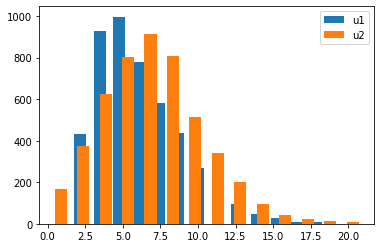

In [80]:
plt.bar(u1nclass[:-1],u1hist,label='u1')
plt.bar(u2nclass[:-1],u2hist,label='u2')
plt.legend()
plt.show()

<H2>Identificación de los parámetros de Weibull</H2>

Varios métodos han sido propuestos para su identificación. Algunos de ellos tienen caracter púramente empíricos como el descrito por Lysen (1983) y otros semi-empíricos como Justus (1978).

En la práctica se sigue el metodo de doble logaritmo, método de $\textit{log-log}$, Rohatgi and Nelson (1994).

Para conseguir obtener la función complemetaria de la probabilidad $$F'(v > V) = 1 - F(v \leq V) \tag{4}$$ es necesaria la normalización del histograma.

Es por ello que se ha de tener una versión discreta numérica de la función acumulada de la distribución, definida según: $$F(v) = \int\limits_{0}^{v} p(v') dv' \tag{4}$$ siendo $v'$ una variable de integración.   

Se debe normalizar el histograma ya que el procedimietno seguido parte del método de la linearización logarítmica de la función de probabilidad acumulada complementaria. 

$$p(v) = \frac{k}{c} \,\left(\frac{v}{c}\right)^{k - 1} e^{- \left(\frac{v}{c}\right)^{k}}$$

siendo 
- $c$: parámetro de escala, $m/s$, 
- $k$: parámetro de forma, no tiene unidades

El cálculo de parámetros resulta de la obtención de los coeficientes de regresión de la serie formada por:

![Procedimiento de cálculo](./Figs/fig01.png)

Método de regresión lineal sobre la disposición de los valores de la serie $(x,y)$

![RegresionLineal](./Figs/fig02.png)

In [81]:
#u1hist.sum()
np.sum(u1hist)

4914

Necesitamos normalizar el histograma

In [82]:
u1histNorm = u1hist/sum(u1hist)

In [83]:
sum(u1hist),sum(u1histNorm)

(4914, 0.9999999999999998)

Integración numérica $$F_M = \sum_{j=0}^M p_j$$ para $M = [0,N]$ 

In [84]:
Fu1 = np.zeros(len(u1histNorm))
for i in range(len(u1histNorm)-1):
    Fu1[i+1] = Fu1[i] + u1histNorm[i]
Fpu1 = 1 - Fu1

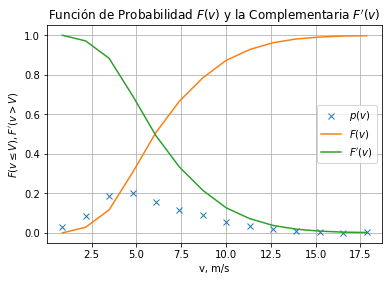

In [85]:
plt.plot(u1nclass[:-1],u1histNorm,'x') # "funcion" de distribucion de la probabilidad 
plt.plot(u1nclass[:-1],Fu1) # funcion de probabilidad
plt.plot(u1nclass[:-1],Fpu1) # funcion de complementaria de la probabilidad
plt.legend(['$p(v)$','$F(v)$','$F\'(v)$'])
plt.xlabel('v, m/s')
plt.ylabel('$F(v\leq V),F\'(v>V)$')
plt.title('Función de Probabilidad $F(v)$ y la Complementaria $F\'(v)$')
plt.grid()
plt.show()

In [86]:
x = np.log(u1nclass[1:-1]) # serie x de la regresion lineal
y = np.log(-np.log(Fpu1[1:])) # serie y de la regresion lineal

In [87]:
x

array([0.77307999, 1.24497764, 1.5642911 , 1.8059441 , 2.00041766,
       2.16315881, 2.30308497, 2.42581359, 2.53511304, 2.63363449,
       2.72331407, 2.80560893, 2.8816433 ])

In [88]:
y

array([-3.52939094, -2.08574999, -1.01004209, -0.34310857,  0.09293649,
        0.42776094,  0.72449719,  0.96504768,  1.18604207,  1.380793  ,
        1.54611062,  1.71477125,  1.80860811])

In [89]:
p = np.polyfit(x,y,1) # ajuste a una recta

Coeficientes de la recta de regresión:

In [90]:
p

array([ 2.4737575 , -5.08006234])

In [91]:
yreg = np.polyval(p,x) # ajuste a la regresion

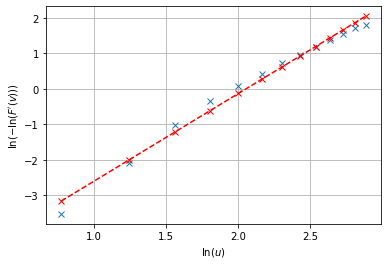

In [92]:
plt.plot(x,y,'x')
plt.plot(x,yreg,'r--x')
plt.grid()
plt.xlabel('$\ln (u)$')
plt.ylabel('$\ln ( -\ln ( F\'(v)))$')
plt.show()

<H3>Parámetros de Weibull</H3>

Obtenibles a partir de, $$k = A \tag{5.a}$$ $$c = \exp \left(-\frac{B}{A}\right) \tag{5.b}$$

In [93]:
k = p[0]
c = math.exp(-p[1]/p[0])
print('c = %.2f m/s\nk = %.2f' % (c,k))

c = 7.80 m/s
k = 2.47


El valor de $k \approx 3$ induce a pensar que la zona está fuertemente influenciada por vientos de mar. Efectivamente , este registro se realizó con la torre de Hovsore, Denmark (56.439825, 8.151433) [maps.google.com](https://www.google.com/maps/place/Hovsore/@56.4405869,8.1500625,367m/data=!3m1!1e3!4m5!3m4!1s0x464a17c808c41d55:0xd2ec8da09d529ab3!8m2!3d56.4397222!4d8.1516667). La torre se encuentra situada a unos 2 km tierra adentro de la zona de costa con el Mar del Norte recibiendo vientos del Oeste.  

En realidad el valor de $c$ corresponde al valor de velocidad $u$ por el cual la recta horizontal que pasa por $0$ de la escala de las ordenadas corta a la recta de la regresión y $k$ es la pendiente de la misma. 

<h2>Comparativas entre datos y modelo</h2>

Comparativas de valores como la media aritmética y la media de Weibull

![Expresiones Weibull](./Figs/fig03.png)

In [94]:
Fmod = lambda v : 1 - math.exp(-(v/c)**k) # funcion de la probabilidad de Weibull

In [95]:
u1nclass

array([ 0.86      ,  2.16642857,  3.47285714,  4.77928571,  6.08571429,
        7.39214286,  8.69857143, 10.005     , 11.31142857, 12.61785714,
       13.92428571, 15.23071429, 16.53714286, 17.84357143, 19.15      ])

In [96]:
Fmodu1 = np.array([Fmod(v) for v in u1nclass[1:]])

In [97]:
Fmodu1

array([0.04122843, 0.12654276, 0.25775979, 0.41838289, 0.58387387,
       0.73054779, 0.84335159, 0.91883972, 0.96278352, 0.98499347,
       0.99471181, 0.99838089, 0.99957169, 0.99990263])

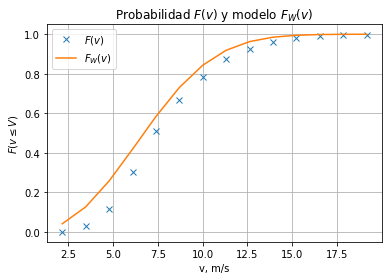

In [98]:
plt.plot(u1nclass[1:],Fu1,'x') #histograma
plt.plot(u1nclass[1:],Fmodu1) #Weibull

plt.legend(['$F(v)$','$F_{W}(v)$'])
plt.xlabel('v, m/s')
plt.ylabel('$F(v\leq V)$')
plt.title('Probabilidad $F(v)$ y modelo $F_{W}(v)$')
plt.grid()
plt.show()

Curva de la velocidad

In [99]:
Fcmodu1 = np.array([1 - Fmod(v) for v in u1nclass[1:]])

In [100]:
Fcmodu1

array([9.58771572e-01, 8.73457242e-01, 7.42240213e-01, 5.81617106e-01,
       4.16126126e-01, 2.69452209e-01, 1.56648408e-01, 8.11602762e-02,
       3.72164785e-02, 1.50065250e-02, 5.28819300e-03, 1.61910548e-03,
       4.28306453e-04, 9.73679116e-05])

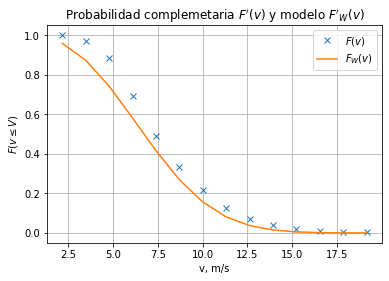

In [101]:
plt.plot(u1nclass[1:],Fpu1,'x')
plt.plot(u1nclass[1:], Fcmodu1)
plt.legend(['$F(v)$','$F_{W}(v)$'])
plt.xlabel('v, m/s')
plt.ylabel('$F(v\leq V)$')
plt.title('Probabilidad complemetaria $F\'(v)$ y modelo $F\'_{W}(v)$')
plt.grid()
plt.show()

Definicion de la función de la distribución de la probabilidad de Weibull

In [102]:
p = lambda v,c,k : (k/c)*(v/c)**(k-1)*np.exp(-(v/c)**k) # función de distribucion de la probabilidad de Weibull

In [103]:
pu1 = np.array([p(v,c,k) for v in u1nclass[:-1]])
pu2 = np.array([p(v,c,k) for v in u2nclass[:-1]])

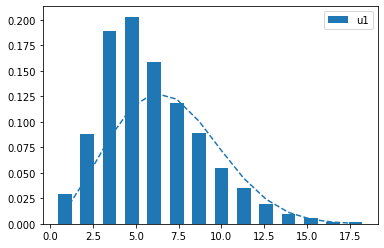

In [104]:
plt.plot(u1nclass[:-1],pu1,'--') 
plt.bar(u1nclass[:-1],u1histNorm,label='u1') 
#plt.plot(u2nclass[:-1],pu2,'--') 
#plt.bar(u2nclass[:-1],u2histNorm, label='u2')
plt.legend()
plt.show()

Comparativa de los datos de la serie y la distribución con los parámetros ($c$ ; $k$)

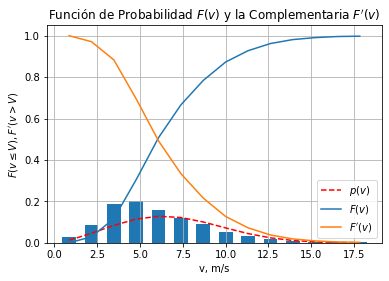

In [105]:
plt.bar(u1nclass[:-1],u1histNorm,label='hist')
plt.plot(u1nclass[:-1],pu1,'r--',label='p(x)') 
plt.plot(u1nclass[:-1],Fu1)
plt.plot(u1nclass[:-1],Fpu1)
plt.legend(['$p(v)$','$F(v)$','$F\'(v)$'])
plt.xlabel('v, m/s')
plt.ylabel('$F(v\leq V),F\'(v>V)$')
plt.title('Función de Probabilidad $F(v)$ y la Complementaria $F\'(v)$')
plt.grid()
plt.show()

Comparativa de histogramas

![Histogramas](./Figs/fig05.png)

<h3>Curva de Duración de la Velocidad del Viento</h3>

Definición de la función de probabilidad complementaria a partir de los parámetros $c$ y $k$. $$F'(v) = \exp\left[-\left(\frac{v}{c}\right)^k\right] \tag{6}$$

In [106]:
Fpmod = lambda v : math.exp(-(v/c)**k)

In [107]:
Fpmodu1 = np.array([ Fpmod(v) for v in u1nclass])

La duración de horas queda definida por la probabilidad complementaria de la existencia de una velocidad determinada o superior.

In [108]:
Duration = np.array([x*24*31 for x in Fpmodu1])

In [109]:
Duration

array([7.40820453e+02, 7.13326050e+02, 6.49852188e+02, 5.52226718e+02,
       4.32723127e+02, 3.09597838e+02, 2.00472444e+02, 1.16546416e+02,
       6.03832455e+01, 2.76890600e+01, 1.11648546e+01, 3.93441559e+00,
       1.20461448e+00, 3.18660001e-01, 7.24417262e-02])

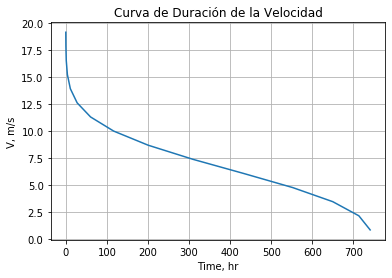

In [110]:
plt.plot(Duration,u1nclass)
plt.grid()
plt.title('Curva de Duración de la Velocidad')
plt.xlabel('Time, hr')
plt.ylabel('V, m/s')
plt.show()

Curva importante para la evaluación del rendimiento de la generación anual de una máquina en particular.

<H3>Ejemplos de Curvas de Duración de la Velocidad según Parámetro k</H3>

Es necesario una redefinición de  la función de probablilidad complementaria para parametrizarla en $k$

In [111]:
Fpmod = lambda v,k : math.exp(-(v/c)**k)

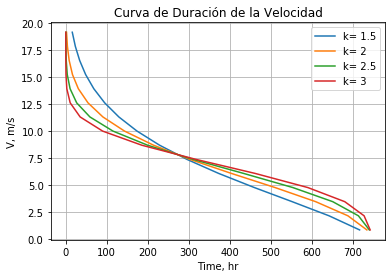

In [112]:
for k in (1.5,2,2.5,3):
    Fpmodu1 = [ Fpmod(v,k) for v in u1nclass]
    Duration = [x*24*31 for x in Fpmodu1]
    plt.plot(Duration,u1nclass,label='k= '+str(k))
    #plt.legend(str(k))

plt.legend()
plt.title('Curva de Duración de la Velocidad')
plt.xlabel('Time, hr')
plt.ylabel('V, m/s')
plt.grid()
plt.show()
    

Cuanto más horizontalizada esté la curva de velocidad, mejores aprovechamientos se conseguiran para la producción de energía durante el año.

<H2>Estimación Analítico/Empírica de los coeficientes de Weibull</H2>

El método semiempírico de Justus (1978) se basa en una aproximación de la función $\Gamma(\cdot)$ y la definición de la varianza según la distribución de Weibull. 

$$\frac{\sigma}{\left< v \right>} = \sqrt{\frac{\Gamma\left(1 + {^2 / _k} \right)}{\Gamma^2\left(1 + {^1 / _k} \right)} - 1} \tag{7}$$

Si $k$ se obtiene con la expresión semi-empírica de Justus,

$$k = \left( \frac{\sigma}{\left< v \right>} \right)^{-1.086} \tag{8}$$ y el factor de escala con la expresión conocida de la velocidad media $$c = \frac{\left< v \right>}{\Gamma\left( 1 + {^1 / _k} \right)}$$

Aplicando (7) y (8) compararemos el error cometido según el método de la práctica.

Ecuación de _Justus, 1978_

$$k = \left(\frac{\sigma}{\bar{v}}\right)^{-1.086}$$
$$c = \frac{\bar{v}}{\Gamma(1+\frac{1}{k})}$$

siendo $\sigma$ y $\bar{v}$ la desviación estandar de la serie según media del histograma. 

In [113]:
u1_sigma = dataWind['vel1'].std() #desviacion estandard tradicional
u1_mean = dataWind['vel1'].mean() #valor media aritmética distribucion uniforme
kJustus = math.pow(u1_sigma/u1_mean,-1.086)
cJustus = u1_mean/math.gamma(1 + 1/kJustus)
print('k = %.2f\nc = %.2f m/s' % (kJustus,cJustus))

k = 2.35
c = 7.35 m/s


Error aproximado a un 10% para el caso de $k$ y del 2% para $c$ si los comparamos con el método de $\textit{log-log}$. 

<h2>Factor de Potencia</h2>

Asumiendo conocidos los valoes de $c$ y $k$ , las espectativas de conocer el valor más probable de la potencia eólica tiene correspondencia directa con la misma espectatica de $\left< v^3 \right>$. 

$$\left< u \right> = c \, \Gamma\left( 1 + {^1 / _k}\right)$$
$$\left< u^3 \right> = \int\limits_{0}^{\infty} u^3 p(u) du = c^3 \, \Gamma\left( 1 + {^3 / _k} \right)$$

Este valor se puede normalizar respecto al $\left< u \right>^3$ quedando la expresión del _Factor de Energía_ $F_e$, $$F_e = \frac{\left< u^3 \right>}{\left< u \right>^3} = \frac{\Gamma\left( 1 + {^3 / _k} \right)}{\Gamma^3\left( 1 + {^1 / _k} \right)} \tag{8}$$

Para el caso analizado, este valor es:

In [114]:
#k = kJustus

In [115]:
k = 2.96

In [116]:
#k = 2.64
from math import gamma
print(k)
Fe = gamma(1+3/k)/(gamma(1+1/k))**3
print('Fe = %.2f' % Fe)

2.96
Fe = 1.41


<h3>Variación del $F_e$ según $k$</h3>

In [117]:
for k in (1.5,2,2.5,3,3.5):
    Fe = math.gamma(1+3/k)/(math.gamma(1+1/k))**3
    print('Fe(%.1f) = %.2f' % (k,Fe))

Fe(1.5) = 2.72
Fe(2.0) = 1.91
Fe(2.5) = 1.58
Fe(3.0) = 1.40
Fe(3.5) = 1.30


$F_e$ representa la dispersión de la energía/potencia real versus la referencia de la potencia de la velocidad media. Cuanto más alto es $k$ esta dispersión disminuye, tal como lo muestra la tabla arriba presentada. 

for k in (1.5,2,2.5,3):
    Fe = math.gamma(1+3/k)/(math.gamma(1+1/k))**3
    print('Fe(%.1f) = %.2f' % (k,Fe))

In [118]:
k = list(map(lambda x : 1 + 0.25*x, range(12)))
k

[1.0, 1.25, 1.5, 1.75, 2.0, 2.25, 2.5, 2.75, 3.0, 3.25, 3.5, 3.75]

In [119]:
Fe = list(map(lambda k : math.gamma(1+3/k)/(math.gamma(1+1/k))**3,k))

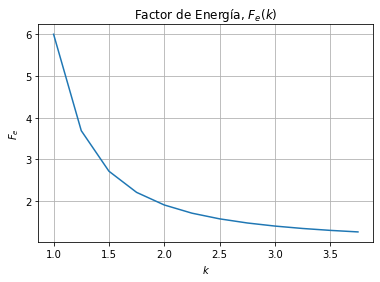

In [120]:
plt.plot(k,Fe)
plt.grid()
plt.title('Factor de Energía, $F_e(k)$')
plt.xlabel('$k$')
plt.ylabel('$F_e$')
plt.show()

A mejores vientos observamos que la dispersión disminuye, una de las justificaciones de la conveniencia de la eólica marina.  

### Cálculo de la densidad de potencia generada (potencia efectiva por unidad de área)

$$\frac{P_{eff}}{A} = \frac{1}{2} \rho F_{e} \bar{V}^3 = \frac{1}{2} \rho\,\left<V^3\right>$$

Produccion de energía

$$E_{prod} = P_{eff} \, T$$ en kWh

En el generador:

$$E_{prod} = P_{eff} \, T \, C_{p}$$

Coeficiente de potencia ideal $$C_{P,Betz} = 59\%$$ y el real $$C_{P} < 45\%$$ 

<h2>Referencias</h2>

- [Justus, 1978]: Justus, C. G. Winds and Wind System Performance. (1978).
- [Jamil, 1994]: Jamil, M. Wind power statistics and evaluation of wind energy density. Wind Eng. 18, 227–240 (1994).
- [Rohatgi and Nelson, 1994]: Rohatgi, J. S. and Nelson, V.  Wind Characteristics: An Analysis for the Generation of Wind Power. Alternative Energy Institute, Canyon, TX. (1994).
- Introducción de Energia Eólica, M. Franquesa
- Gary Johnson, Wind Energy

### Otras alternativas para conseguir los parámetros de Weibull 

In [121]:
from numpy import histogram
from numpy import mean as npmean
#import scikits.timeseries as ts
import pandas.tseries as ts
from scipy.special import gamma
from matplotlib.pyplot import psd

Ecuación de _Justus, 1978_

$$k = \left(\frac{\sigma}{\bar{v}}\right)^{-1.086}$$
$$c = \frac{\bar{v}}{\Gamma(1+\frac{1}{k})}$$

siendo $\sigma$ y $\bar{v}$ la desviación estandar de la serie según media del histograma. 

In [122]:
def get_weibull_params(mean, stdev):
    """
    Returns Weibull parameters c and k.
    Input: mean, stdev
    Output: Weibull scale: c, shape: k
    Citation: Manwell 2000, chapter 2"""
    if mean > 0:
        k = (stdev / mean)**-1.086
        c =  mean / gamma(1 + 1 / k)
    else:
        k, c = 0, 0
    return c, k

**Propuesta de trabajo**: evaluar el error entre $k$'s según el método de la regresión y el de Justus 

In [123]:
def get_statistics(timeseries, output='dictionary'):
    """
    Collects statistics from a timeseries object.
    
    Input: A timeseries object, output format ('dictionary' or 'list')
    Output: Dictionary or array of mean, stdev, max, min, size
    """
    stat_names = ['mean', 'std', 'max', 'min', 'size']
    stat_values = [timeseries.mean(), timeseries.std(),
    timeseries.max(), timeseries.min(),timeseries.size]
    
    if output == 'list':
        return stat_values
    else:
        tsdict = {}
        for index in range(5):
            tsdict[stat_names[index]] = stat_values[index]
        return tsdict

In [124]:
def get_histogram_data(timeseries, bins=10, normalized=True):
    """
    Returns histogram data of timeseries object
    Input: timeseries obj.
    Optional: No. of bins (default is 10), normalized (boolean)
    Output: Tuple (histogram, bin_edges)
    """
    return histogram(timeseries, bins, normed=normalized)